# Classification

Classification problems form a collection of machine learning problems that require the algorithm to idenitfy which class a data point belongs to.

The simplest form of classification is *binary* classification. Here there are only two possible classes, usually '0' and '1'. The algorithm then aims to find a *decision boundary* that accurately splits up the two classes in feature space.

*Multi-class* classification is the set of problems where each data point can belong to one of many classes (here many means more than 2). These problems often require slightly different algorithms compared to binary classification, incorporating tricks like the *one-vs-all* or *one-vs-one* methods.

## Logistic Regression

Logistic regression is an example of a binary classification algorithm. It works in a similar way to linear regression, except that the output is manipulated to give a binary output and the loss function is adjusted to work for classification.

An example dataset is defined below:

In [1]:
import numpy as np

# Define the features, the independent variables. This example has two features.
x = np.array([[2,7],[1,1],[3,18],[2,5],[1,2],[3,10]])

# Define the labels, the dependent variables
y = np.array([1,0,1,1,0,1])

# A single data point is then:
p1 = np.array([x[0], y[0]])
print('Example Datapoint: ', p1)

Example Datapoint:  [array([2, 7]) 1]


As with linear regression, the first thing to define is our *hypothesis function*. Here we ensure that the output of our classification algorithm is between 0 and 1:

`0 <= h(theta) <= 1`

This ensures that the output can easily be converted into a prediction of which class the data point belongs to by setting a threshold on the output of the hypothesis function. Usually by default this threshold is set at 0.5

In logistic regression the hypothesis function is converted to a value between 0 and 1 by using the *sigmoid* function. This is the function

`1 / (1+exp(z))`

and is available in scipy:

In [2]:
from scipy.special import expit

# Our hypothesis function estimates the dependent variable
def hypothesis_function(x, theta_0, theta_1):
    return expit(theta_0 + np.matmul(x, theta_1))

This function will produce an estimate for the label of the data point based on the features and the parameters `theta_1` and `theta_2`. An example with dummy values for `theta_0` ad `theta_1` is shown below

In [3]:
theta_0 = 1
theta_1 = np.array([1,1]) # One parameter for each feature

# Our hypothesis function
estimate_y = hypothesis_function(x, theta_0, theta_1)

print('Estimate: ', estimate_y)
print('Actual: ', y)

Estimate:  [ 0.9999546   0.95257413  1.          0.99966465  0.98201379  0.99999917]
Actual:  [1 0 1 1 0 1]


As the output of our hypothesis function is between 0 and 1, we can assume that it represents the *probability* that the data point input belongs to the class `1`. Therefore if the output is 0.7, it can be said that this represents a probability of 70% that this example belongs to class `1`

## Loss Function

As with linear regression, we need to find a method to automatically find the values of the parameters `theta_0` and `theta_1` that predict the classes of the data points with the highest accuracy. As before, this requires the definition of a *loss function* that can be minimised using the gradient descent algorithm.



In [4]:
def loss_function(y, estimate_y):
    return np.mean(-y*np.log(estimate_y) + -(1-y)*np.log(1-estimate_y))

As with linear regression, our loss function measures how well our predictions match the actual labels on our data. Our choice of loss function is such that the worse our prediction, the higher the penalty.

If the label is 1, then the loss function looks like the following for different outputs of the hypothesis function:

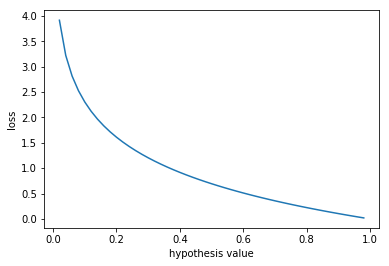

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

z = (np.arange(49)+1)/50.
loss = np.empty(49)

for i in range(49):
    loss[i] = loss_function(1, z[i])

plt.plot(z, loss)
plt.xlabel('hypothesis value')
plt.ylabel('loss')

Alternatively if the label is 0, the loss looks like the following:

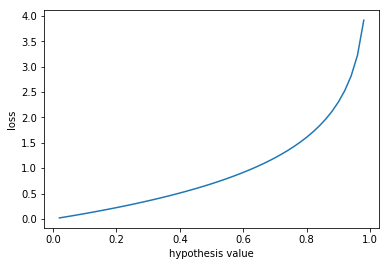

In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

z = (np.arange(49)+1)/50.
loss = np.empty(49)

for i in range(49):
    loss[i] = loss_function(0, z[i])

plt.plot(z, loss)
plt.xlabel('hypothesis value')
plt.ylabel('loss')

The choice of cost function therefore gives a useful feedback as to how well our hypothesis function is currently performing. Additionally, it can be shown that this cost function results in a *convex* function, allowing us to use gradient descent and find the one global minimum.

In [12]:
theta_0 = 1
theta_1 = np.array([1,1]) # One parameter for each feature

estimate_y = hypothesis_function(x, theta_0, theta_1)

loss = loss_function(y, estimate_y)
print('Loss: ', loss)

Loss:  1.17785315276


## Gradient Descent

The same gradient descent update rule can be used that was introduced in linear regression:

theta_i := theta_i - alpha * grad(loss_function w.r.t. theta_i)

Calculating the gradient of our loss function results in the following gradient descent update rule for logistic regression:

In [13]:
def gradient_descent_update(x, y, theta_0, theta_1, learning_rate=0.01):
    new_theta_0 = theta_0 - learning_rate * (np.sum(hypothesis_function(x, theta_0, theta_1) - y, axis=0) / len(y))
    new_theta_1 = theta_1 - learning_rate * (np.matmul((hypothesis_function(x, theta_0, theta_1) - y), x) / len(y))
    return new_theta_0, new_theta_1

Note that this update rule is *exactly the same* as the update rule for linear regression, just with a different hypothesis function

With this update rule defined, we have everything we need to perform binary logistic regression.

In [14]:
# Initialise parameter values
theta_0 = 1
theta_1 = np.array([1,1])

# Gradually update the parameter values
n = 0
while n < 20000:
    theta_0, theta_1 = gradient_descent_update(x, y, theta_0, theta_1)
    n += 1
    
print('theta_0: ', theta_0)
print('theta_1: ', theta_1)
print('Final Loss: ', loss_function(y, hypothesis_function(x, theta_0, theta_1)))

theta_0:  -5.30408731214
theta_1:  [-1.84584055  2.42379972]
Final Loss:  0.0245959476373


The output final loss suggests that the algorithm has converged, and we can check by comparing the predicted values against the actual values:

In [15]:
def predict_labels(x, theta_0, theta_1, threshold = 0.5):
    return 1*np.greater_equal(hypothesis_function(x, theta_0, theta_1), threshold)

In [16]:
print('Actual labels: ', y)
predicted_labels = predict_labels(x, theta_0, theta_1)
print('Predicted labels: ', predicted_labels)

Actual labels:  [1 0 1 1 0 1]
Predicted labels:  [1 0 1 1 0 1]


We can then measure the accuracy on the training set as the number of correctly classified data points divided by the total number of data points:

In [17]:
accuracy = 100*np.sum(y==predicted_labels)/len(y)
print('Accuracy: ', accuracy, '%')

Accuracy:  100.0 %


## Multi-Class Classification

Here we will use the *one-vs-all* paradigm to apply the logistic regression algorithm above to a multi-class setting:

In [18]:
import numpy as np

# Define the features, the independent variables. This example has two features.
x = np.array([[2,7],[1,1],[3,18],[2,5],[1,2],[3,10]])

# Define the labels, the dependent variables
y = np.array([1,0,2,1,0,2])

# A single data point is then:
p1 = np.array([x[0], y[0]])
print('Example Datapoint: ', p1)

Example Datapoint:  [array([2, 7]) 1]


We cannot directly apply our logistic regression algorithm to this problem as our loss function was defined explicitly for the binary case where our label was either 0 or 1

The one-vs-all paradigm involves reducing the set of classes into multiple binary classification problems. This is done by setting all classes except for one to be the *negative* class, and the target class as the *positive* class, and then repeating this to find a decision boundary for each class in turn

To then classify the point, we select the class that gives the maximum likelihood from all of the trained classifiers

In [19]:
possible_classes = [0,1,2]

# Initialise parameter values
theta_0 = np.ones(len(possible_classes))
theta_1 = np.array([np.ones(len(possible_classes)),np.ones(len(possible_classes))])

for i in range(len(possible_classes)):
    new_y = np.array([])
    for label in y:
        if label==possible_classes[i]:
            new_y = np.append(new_y, 1)
        else:
            new_y = np.append(new_y, 0)

    # Gradually update the parameter values
    n = 0
    while n < 20000:
        theta_0[i], theta_1[:,i] = gradient_descent_update(x, new_y, theta_0[i], theta_1[:,i])
        n += 1
        
print(theta_0)
print(theta_1)
                

[ 5.31106484 -2.04777234 -6.79007285]
[[ 2.07723007  1.76489344 -1.52059359]
 [-2.52525259 -0.31958367  1.26753184]]


Now we have trained the three seperate binary classifiers, we can predict the label of each data point by taking the maximum output of the classifiers:

In [20]:
def predict_labels_multiclass(x, theta_0, theta_1):
    max_value = np.zeros(len(x))
    predicted_label = -1*np.ones(len(x))
    for i in range(len(theta_0)):
        value = hypothesis_function(x, theta_0[i], theta_1[:,i])
        for j in range(len(x)):
            if value[j] > max_value[j]:
                max_value[j] = value[j]
                predicted_label[j] = i
            
    return predicted_label

In [21]:
print('Actual labels: ', y)
predicted_labels = predict_labels_multiclass(x, theta_0, theta_1)
print('Predicted labels: ', predicted_labels)

accuracy = 100*np.sum(y==predicted_labels)/len(y)
print('Accuracy: ', accuracy, '%')

Actual labels:  [1 0 2 1 0 2]
Predicted labels:  [ 1.  0.  2.  1.  0.  2.]
Accuracy:  100.0 %
